In [1]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

%matplotlib inline


image_bank = {}

In [2]:
def invert(image):
    return 255 - image


def get_image(filename='img/skeleton1.jpg'):
    if filename in image_bank.keys():
        return image_bank[filename]
    
    img = cv2.imread(filename)
    image_bank[filename] = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return image_bank[filename]


def plot_image(images, size=(4, 4)):
    if not isinstance(images, list):
        images = [images]
        
    fig, axs = plt.subplots(1, len(images), figsize=size,  dpi=300)
    
    for i, image in enumerate(images):
        ax = axs[i] if len(images) > 1 else axs

        ax.imshow(image, cmap='gray')
        ax.axis('off')

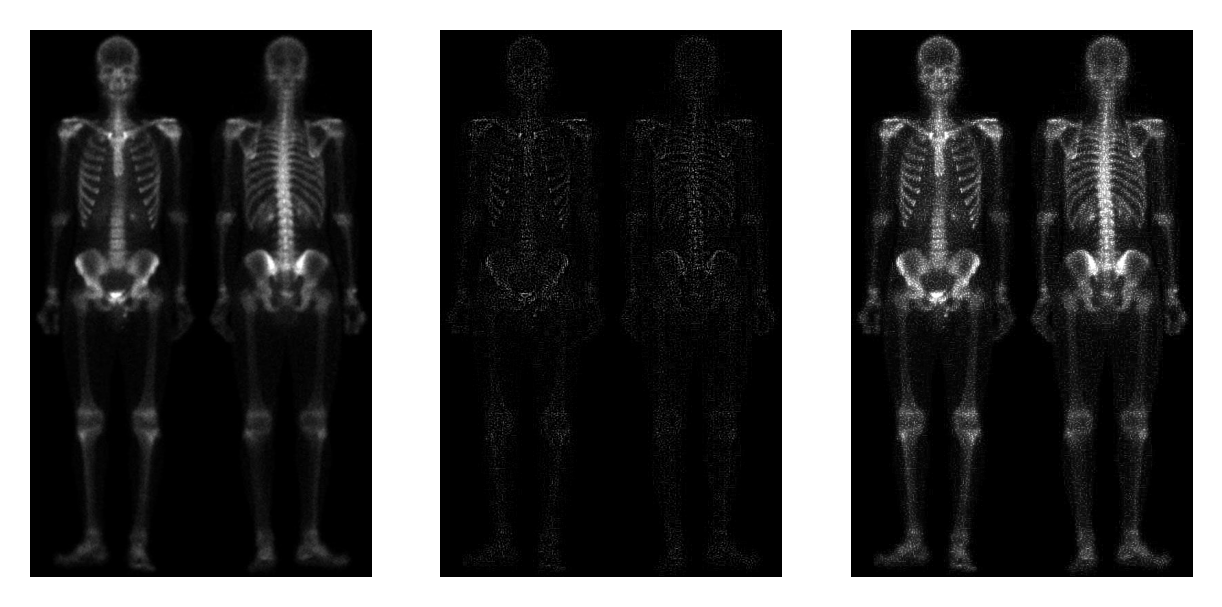

In [3]:
step1 = cv2.Laplacian(invert(get_image()), cv2.CV_16U, ksize=3)

step2 = get_image().astype(np.uint16) + step1
step2[step2 > 255] = 255

plot_image([get_image(), step1, step2], size=(5, 5))

In [4]:
def norm(image):
    return cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_64F)


# original_image = cv2.imread('img/skeleton1.jpg', cv2.IMREAD_GRAYSCALE)
# original_image = norm(original_image)

# laplasian = cv2.Laplacian(original_image, cv2.CV_64F)
# result = original_image + laplasian

# plot_image([original_image, laplasian, result], size=(5, 5))

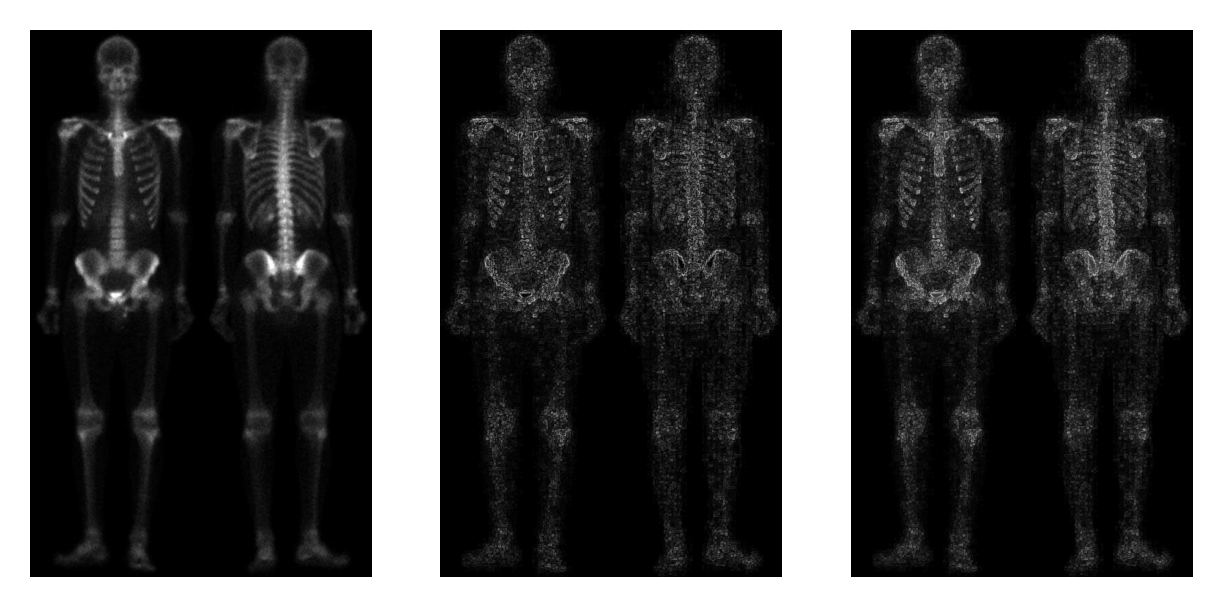

In [5]:
sobel_x = cv2.Sobel(step2, ddepth=cv2.CV_16S, dx=1, dy=0)
sobel_y = cv2.Sobel(step2, ddepth=cv2.CV_16S, dx=0, dy=1)
sobel = np.absolute(sobel_x) + np.absolute(sobel_y)
result = get_image() + sobel

plot_image([get_image(), sobel, result], size=(5, 5))

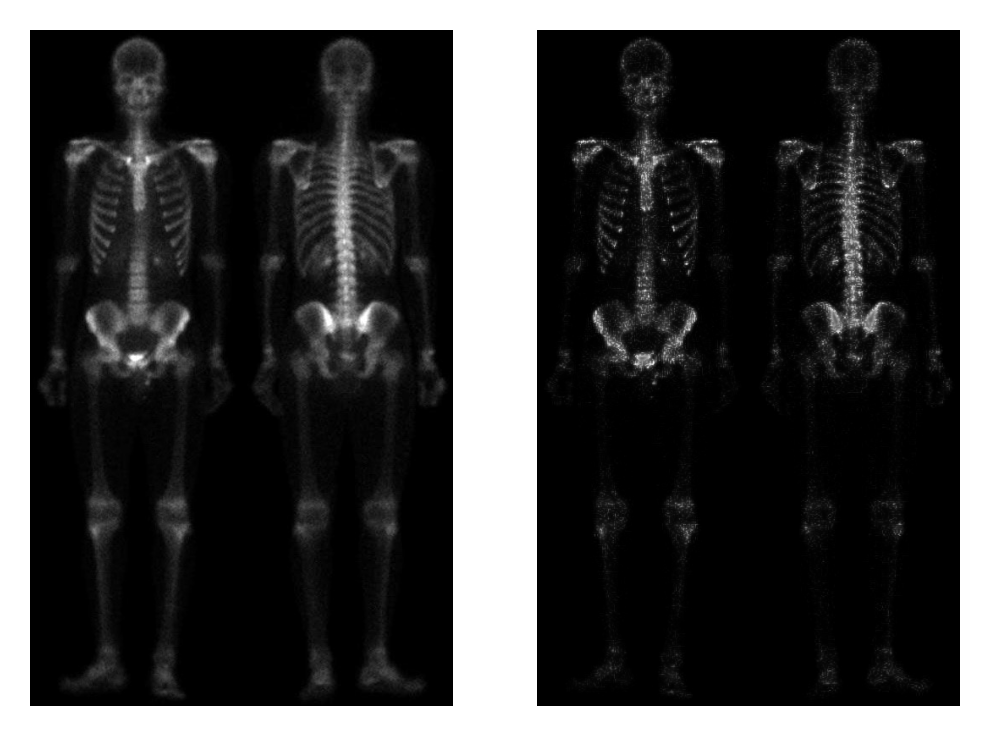

In [6]:
step4 = cv2.blur(norm(result) * 255, (5, 5)) * step2
step5 = norm(get_image() + step4)

plot_image([get_image(), step5])


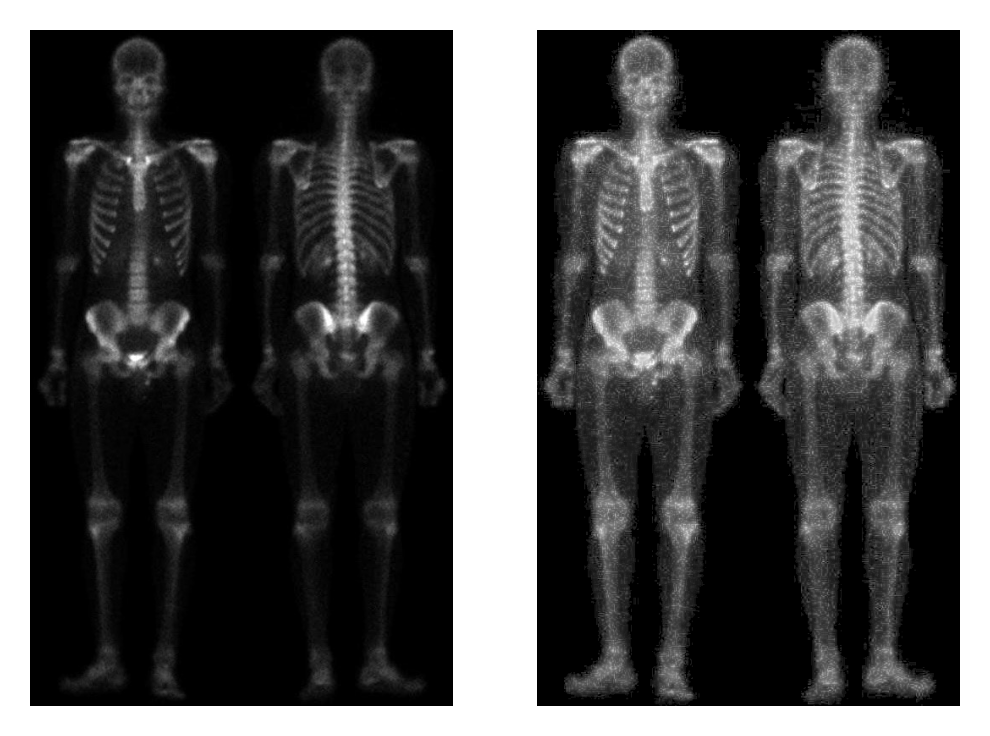

In [12]:
plot_image([get_image(), np.power(step5, 0.3)])